# Libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import unicodedata

# Insights

In [5]:
G = nx.read_graphml('../graph/dark_souls_graph.graphml')
enti = pd.read_csv('../data/entidades.csv')
rela = pd.read_csv('../data/relacoes.csv')

### Insight 1: Most Connected Entities (Highest Degree in the Graph)

First, let’s identify the most connected nodes. This insight highlights the network’s most connected entities, revealing central hubs in the lore and structure of the Dark Souls universe. Entities with a high degree often represent locations of major narrative or functional relevance, such as areas interlinking multiple characters and events. This kind of analysis helps quickly identify key points of the world and serves as a foundation for deeper studies of centrality and influence.

In [ ]:
graus = dict(G.degree())

graus_ordenados = sorted(graus.items(), key=lambda x: x[1], reverse=True)

for node_id, grau in graus_ordenados[:10]:
    entidade = G.nodes[node_id]
    print(f"{entidade['name']} (type: {entidade['type']}) — {grau} connections")


anor londo (type: location) — 26 connections
gwyn, lord of cinder (type: character) — 26 connections
artorias the abysswalker (type: character) — 25 connections
oolacile (type: location) — 24 connections
big hat logan (type: character) — 21 connections
seath the scaleless (type: character) — 16 connections
witch of izalith (type: title) — 16 connections
new londo ruins (type: location) — 15 connections
the abyss (type: location) — 15 connections
solaire of astora (type: character) — 14 connections


The results show a balance between locations (Anor Londo, Oolacile, New Londo Ruins) and characters (Gwyn, Artorias, Logan) among the most connected entities in the graph. This suggests that both geographic centers and key figures are critical hubs in the narrative structure of Dark Souls.

The presence of Gwyn, Artorias, and Seath near the top highlights how legendary characters are frequently referenced or involved in multiple relationships, reinforcing their mythological status in the lore.

Meanwhile, highly connected locations like Anor Londo and Oolacile point to places of great historical and narrative weight locations where events, characters, or items converge.

The appearance of titles (Witch of Izalith) also suggests that named roles carry narrative significance on par with characters and places, possibly functioning as bridges across storylines.

Overall, the most connected entities act as structural anchors, indicating focal points of storytelling, player interaction, and lore density within the Dark Souls universe.

### Insight 2: What Are the Most Frequent Types of Relationships?

This insight reveals the 10 most common types of relationships between entities in the Dark Souls universe. Through this analysis, we can understand how the narrative is structured—whether through location, function, narrative mention, or other criteria. It unveils the importance placed on world-building, mechanics, and how the story is told indirectly through connections and references.

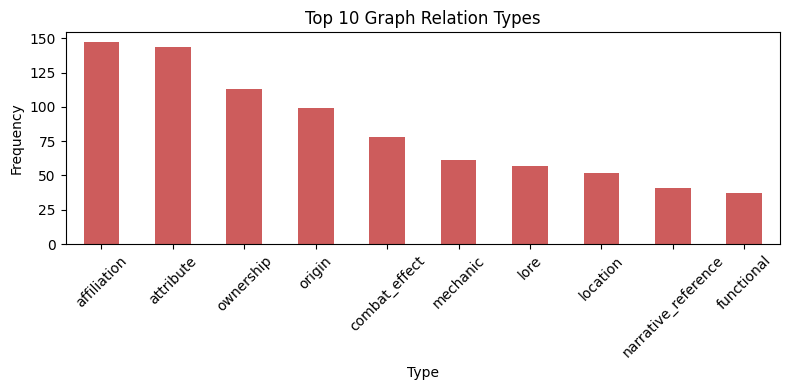

In [ ]:
rel_types = nx.get_edge_attributes(G, "relation_type")
rel_series = pd.Series(list(rel_types.values()))

rel_series_clean = rel_series[~rel_series.isin(["nan", None, "", float("nan")])]

rel_counts = rel_series_clean.value_counts()
top_rel_counts = rel_counts.head(10)

plt.figure(figsize=(8, 4))
top_rel_counts.plot(kind="bar", color="indianred")
plt.title("Top 10 Graph Relation Types")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The most frequent relation types in the knowledge graph are “affiliation” and “attribute”, each appearing nearly 150 times. This suggests that the graph heavily emphasizes how entities belong to groups (factions, schools, titles) or are related to other entities (friend of, son of) and how they are described (magical, undead, corrupted).

The prominence of “ownership” and “origin” further indicates the narrative weight placed on who possesses certain items or where entities come from, reinforcing Dark Souls’ themes of inheritance, legacy, and geographic lore.

More mechanical aspects, such as “combat_effect” and “mechanic”, appear next, reflecting how gameplay-relevant information is also embedded in the graph (what causes poison, what boosts fire resistance).

Lower-ranked but still notable are “lore”, “location”, and “narrative_reference”, highlighting that while storytelling context is present, the graph prioritizes functional and structural relationships over pure exposition.

This distribution reveals that the graph is not just a web of characters and places, but a structured system that blends game mechanics, worldbuilding, and entity roles, enabling both narrative and gameplay insights.

### Insight 3: Who Mentions or Connects with Artorias, the Abysswalker?

Artorias is a key narrative axis in the Dark Souls universe, as highlighted in Insight 1. Understanding who mentions him, carries his soul, uses his weapons, or inherits his memory helps map the web of consequences his legacy caused in the world.
This reflects the game’s indirect storytelling structure, where information about a character is distributed through items, locations, weapons, and dialogue. This analysis simulates the player’s or lore analyst’s work in “reconstructing” a story from clues.
It exemplifies the power of the graph for decentralized storytelling, where the narrative isn’t told through a linear timeline, but through connections between entities spread across different in-game media.

In [ ]:
for node_id, data in G.nodes(data=True):
    if data.get("name", "").lower() == "artorias the abysswalker":
        print(f"artorias the abysswalker ID: {node_id}")


artorias the abysswalker ID: 58


In [ ]:
artorias_id = '58'

conexoes = []
for u, v, data in G.in_edges(artorias_id, data=True):
    conexoes.append({
        "entity": G.nodes[u].get("name", ""),
        "entity_type": G.nodes[u].get("type", ""),
        "relation": data.get("relation", ""),
        "note": data.get("note", "")
    })

pd.DataFrame(conexoes)


,entity,entity_type,relation,note
0,the abyss,location,traversed by,Knight Artorias is believed to have traversed ...
1,great grey wolf sif,character,companion_of,Sif was Artorias’s loyal companion.
2,greatsword of artorias,greatsword,used_by,Legendary knight who fought the Abyss.
3,greatshield of artorias,shield,associated_with,Guardian of the knight's resting place.
4,abyss greatsword,greatsword,belongs_to,Weapon that reflects humanity and Abyss taint.
5,cleansing greatshield,shield,used_by,Used to protect Sif from the Abyss.
6,wolf ring,ring,associated_with,NaN
7,soul of sif,soul_boss,associated_with,Boss soul. Sif guards Artorias's grave. Divine...
8,soul of artorias,soul_boss,boss_soul_of,Artorias was consumed by the Abyss; the player...
9,crest of artorias,key,related_to,Linked to the grave of Sir Artorias


This insight reveals the dense narrative ecosystem surrounding Artorias the Abysswalker. Entities linked to him include:

Locations (The Abyss)

Weapons and shields (Greatsword of Artorias, Abyss Greatsword, Cleansing Greatshield)

Companions (Great Grey Wolf Sif, Alvina, Ciaran, Gough)

Titles and artifacts (Four Knights, Wolf Ring, Soul of Artorias)

### Insight 4: What Are the Most Connected Locations in the Graph?

Locations with the most connections are usually narrative or historical centers, repeatedly appearing in item descriptions, spells, characters, and events.
This allows us to visualize places that connect many elements of the universe and thus help understand the narrative’s geographical and thematic distribution.

In [ ]:
location_degrees = Counter()

for u, v in G.edges():
    if G.nodes[u].get("type") == "location":
        location_degrees[u] += 1
    if G.nodes[v].get("type") == "location":
        location_degrees[v] += 1

top_locations = location_degrees.most_common(10)
top_locs_df = pd.DataFrame(top_locations, columns=["location_id", "connections"])
top_locs_df["location_name"] = top_locs_df["location_id"].apply(lambda x: G.nodes[x].get("name", ""))

top_locs_df[["location_name", "connections"]]


,location_name,connections
0,anor londo,26
1,oolacile,24
2,new londo ruins,15
3,the abyss,15
4,vinheim dragon school,11
5,darkroot garden,9
6,ancient kingdom of balder,8
7,blighttown,7
8,lost izalith,7
9,sen's fortress,7


This insight reveals the key narrative and mechanical hubs across the world of Dark Souls by ranking locations based on their number of direct connections in the graph. The graph positions these locations as narrative anchors, helping players orient themselves in the complex mythos of Dark Souls.

### Insight 5: Which characters are most connected to other entities?

Characters that are central tend to be the most referenced — appearing in items, spells, dialogue, and locations. They help structure our understanding of the main narrative threads.

This distinction allows us to separate characters with deep lore relevance (such as Artorias or Gwyn) from those with more situational roles.

It also provides a basis to answer questions like:

- “Who are the hidden protagonists of the universe?”
- “Which characters impact the narrative the most through their connections?”


In [ ]:
character_degrees = Counter()

for u, v in G.edges():
    if G.nodes[u].get("type") == "character":
        character_degrees[u] += 1
    if G.nodes[v].get("type") == "character":
        character_degrees[v] += 1

top_characters = character_degrees.most_common(10)
top_chars_df = pd.DataFrame(top_characters, columns=["character_id", "connections"])
top_chars_df["character_name"] = top_chars_df["character_id"].apply(lambda x: G.nodes[x].get("name", ""))

top_chars_df[["character_name", "connections"]]


,character_name,connections
0,"gwyn, lord of cinder",26
1,artorias the abysswalker,25
2,big hat logan,21
3,seath the scaleless,16
4,solaire of astora,14
5,havel the rock,14
6,quelana of izalith,14
7,hawkeye gough,14
8,dragonslayer ornstein,13
9,four kings,12


These figures are not just "important" — they act as narrative bridges, linking places, artifacts, status effects, and other characters.

In sum, this insight suggests that connectivity correlates strongly with thematic weight, helping us identify not only protagonists, but also characters whose actions, teachings, or legacies resonate throughout the world.

### Insight 6: Which entities are directly connected to the “Sealers of New Londo”?

Entities directly connected to the Sealers of New Londo reveal who holds this title or is part of this group. This information allows the player to understand who participated in the sealing of New Londo and who still carries that legacy.

In [ ]:
def normalize(text):
    return unicodedata.normalize("NFKD", text.lower()).encode("ASCII", "ignore").decode("utf-8")

target_name = "sealers of new londo"
target_id = None

for node_id, data in G.nodes(data=True):
    name = data.get("name", "")
    if normalize(name) == normalize(target_name):
        target_id = node_id
        break

if target_id is None:
    print(" Não foi possível encontrar 'Sealers of New Londo'")
else:
    neighbors = []
    for u, v, data in G.edges(data=True):
        if u == target_id or v == target_id:
            neighbor_id = v if u == target_id else u
            neighbors.append({
                "entity_name": G.nodes[neighbor_id].get("name", ""),
                "entity_type": G.nodes[neighbor_id].get("type", ""),
                "relation": data.get("relation", "")
            })

    sealers_df = pd.DataFrame(neighbors)
    display(sealers_df)


,entity_name,entity_type,relation
0,new londo ruins,location,sealed by
1,mask of the sealer,helm,used_by
2,crimson robe,armor,used_by
3,crimson gloves,gauntlets,used_by
4,crimson waistcloth,leggings,used_by
5,ingward,character,member_of
6,darkwraiths,faction,sealed_away
7,four kings,character,sealed_away
8,crimson attire,armor,known_for
9,yulva,character,member_of


The extracted connections surrounding the Sealers of New Londo reveal their critical role in containing a great threat within the lore:

New Londo Ruins were sealed by the group, emphasizing their responsibility in halting the spread of the Abyss.

Characters like Ingward and Yulva are members, giving us identifiable figures within this mysterious order.

Their distinctive armor set (Crimson Attire, Robe, Gloves, Waistcloth) and the Mask of the Sealer reflect both their lore function and gameplay relevance.

The sealing of the Darkwraiths and the Four Kings ties the Sealers directly to some of the most dangerous forces in the game’s mythology.

This insight illustrates how a single faction, though not heavily emphasized in dialogue, exerts profound narrative influence by acting as a safeguard against Abyssal corruption — a recurring theme in Dark Souls.

### Insight 7 — Which entities are directly connected to “Gwyn, Lord of Cinder”?

During the exploratory analysis of the graph, we identified that Gwyn, Lord of Cinder was the character with the highest number of direct connections among all entities in the Dark Souls universe. This finding emerged in Insight 1, when mapping the nodes with the highest degree (number of connections), highlighting Gwyn as a central figure in the graph and, consequently, in the narrative itself.

Given this, it became essential to investigate which entities are directly linked to Gwyn, in order to better understand the network of influence, legacy, and mythical relationships surrounding this character.

In [ ]:
gwyn_node_id = None
for node_id, data in G.nodes(data=True):
    if data.get("name", "").strip().lower() == "gwyn, lord of cinder":
        gwyn_node_id = node_id
        break

gwyn_relations = []

if gwyn_node_id:
    neighbors = list(G.predecessors(gwyn_node_id)) + list(G.successors(gwyn_node_id))
    
    for n in neighbors:
        edge_data = G.get_edge_data(n, gwyn_node_id, default={}) or G.get_edge_data(gwyn_node_id, n, default={})
        
        if edge_data:
            relation = edge_data.get("relation", "")
            relation_type = edge_data.get("relation_type", "")
            gwyn_relations.append({
                "entity_name": G.nodes[n].get("name", ""),
                "entity_type": G.nodes[n].get("type", ""),
                "relation": relation,
                "relation_type": relation_type
            })

gwyn_df = pd.DataFrame(gwyn_relations)
gwyn_df


,entity_name,entity_type,relation,relation_type
0,solaire of astora,character,mentions,character-character
1,seath the scaleless,character,confidant_of,allegiance
2,dark sun gwyndolin,character,child_of,lore
3,great lord greatsword,greatsword,used_by,ownership
4,crown of the great lord,helmet,belongs_to,ownership
5,robe of the great lord,armor,belongs_to,ownership
6,bracelet of the great lord,gauntlets,part_of_set,attribute
7,anklet of the great lord,leggings,part_of_set,attribute
8,"soul of gwyn, lord of cinder",soul_boss,originates_from,origin
9,lord soul,key_item,related_to,NaN


The connections surrounding Gwyn reinforce his role as a mythological axis within the Dark Souls universe:

Several characters are defined by their relation to Gwyn — including his children (Gwyndolin, Gwynevere, and his unnamed firstborn), allies (Havel, Seath), and subordinates (Four Knights, Black Knights).

Multiple items bear his name or were used by him — such as his armor set and the Great Lord Greatsword — highlighting his cultural and symbolic permanence.

He is thematically bound to the First Flame, the Age of Fire, and the Lord Soul, positioning him as a foundational figure of the current era.

Narrative ties also include spiritual alliances (Kingseeker Frampt, Allfather Lloyd) and enemies empowered by his legacy (Four Kings).

This insight confirms that Gwyn’s mythos touches nearly every corner of the lore — shaping not only the world’s history, but its mechanics, characters, and ongoing conflict between light and dark.

### Insight 8: Who are the blacksmiths in the Dark Souls universe?

The Dark Souls universe presents a wide array of weapons, enchantments, and modifications that are central to player progression. Knowing which characters hold the title of blacksmith is essential to understanding who the masters are behind forging, reinforcing, or imbuing these armaments with power.

In [38]:
blacksmiths = []

for u, v, data in G.edges(data=True):
    source_name = str(G.nodes[u].get("name", "")).lower()
    target_name = str(G.nodes[v].get("name", "")).lower()
    source_type = str(G.nodes[u].get("type", "")).lower()
    target_type = str(G.nodes[v].get("type", "")).lower()
    relation = str(data.get("relation", "")).lower()
    relation_type = str(data.get("relation_type", "")).lower()
    
    if (
        "blacksmith" in source_name or "blacksmith" in target_name or
        "blacksmith" in relation or "blacksmith" in relation_type or
        source_type == "blacksmith" or target_type == "blacksmith"
    ):
        blacksmiths.append({
            "source": G.nodes[u].get("name", ""),
            "source_type": G.nodes[u].get("type", ""),
            "relation": data.get("relation", ""),
            "relation_type": data.get("relation_type", ""),
            "target": G.nodes[v].get("name", ""),
            "target_type": G.nodes[v].get("type", "")
        })

blacksmith_df = pd.DataFrame(blacksmiths)
blacksmith_df.drop_duplicates()


,source,source_type,relation,relation_type,target,target_type
0,anor londo,location,home to,location-character,giant blacksmith,character
1,blacksmith hammer,hammer,used_by,affiliation,andre of astora,character
2,blacksmith giant hammer,hammer,used_by,affiliation,giant blacksmith,character
3,blacksmith giant hammer,hammer,associated_with,location,anor londo,location
4,lightning bolt,bolt,crafted_by,origin,giant blacksmith,character
5,large ember,ember,used_by_blacksmiths,functional,blacksmiths of astora,character_group
6,very large ember,ember,used_by_blacksmiths,functional,undead parish giant blacksmith,blacksmith
7,large magic ember,ember,used_by_blacksmiths,functional,vinheim blacksmiths,character
8,giant blacksmith,character,resides_in,location,anor londo,location
9,giant blacksmith,character,crafts,ability,lightning-based weapons,weapon


This insight outlines a distinct cluster of influence surrounding the blacksmith role — highlighting not just individual NPCs, but how lore, crafting mechanics, and weapon progression intertwine across the game’s design.

### Insight 9: Which entities are associated with a Lord Soul?

During the graph analysis, Gwyn—one of the central figures in the narrative—revealed recurring connections with soul-related entities, such as "Soul of Gwyn" and "Lord Soul." This frequency of relationships involving soul-based concepts sparked interest in understanding who else, within the Dark Souls universe, is connected to a Lord Soul.

In [ ]:
lord_soul_links = []

for u, v, data in G.edges(data=True):
    relation = str(data.get("relation_type", "")).lower()
    label = str(data.get("label", "")).lower()
    u_name = str(G.nodes[u].get("name", "")).lower()
    v_name = str(G.nodes[v].get("name", "")).lower()
    
    if "lord soul" in relation or "lord soul" in label or "lord soul" in u_name or "lord soul" in v_name:
        source = G.nodes[u].get("name", "Unknown")
        target = G.nodes[v].get("name", "Unknown")
        rel = data.get("relation_type", "unknown")
        lord_soul_links.append((source, target, rel))

df_lordsoul = pd.DataFrame(lord_soul_links, columns=["source_entity", "target_entity", "relation"])
df_lordsoul


,source_entity,target_entity,relation
0,gravelord nito,lord soul,power
1,seath the scaleless,lord soul fragment,reward
2,four kings,lord soul fragment,reward
3,lord soul,gravelord nito,NaN
4,lord soul,"gwyn, lord of cinder",NaN
5,lord soul,bed of chaos,NaN
6,bequeathed lord soul shard,four kings,NaN
7,bequeathed lord soul shard,seath the scaleless,NaN
8,witch of izalith,lord soul,possession


# Question-answering capability

### QA 1 — Who are the Sealers of New Londo?

In [ ]:
target_id = next(
    (n for n, d in G.nodes(data=True) if normalize(d.get("name")) == "sealers of new londo"),
    None
)

if target_id:
    results = []
    for u, v, d in G.edges(data=True):
        if d.get("relation") == "member_of" and (u == target_id or v == target_id):
            other = v if u == target_id else u
            name = normalize(G.nodes[other].get("name", ""))
            if name in ["ingward", "yulva"]:
                results.append({
                    "entity_name": G.nodes[other].get("name", ""),
                    "entity_type": G.nodes[other].get("type", ""),
                    "relation": d.get("relation", "")
                })

    df = pd.DataFrame(results)
    display(df)
else:
    print("Nó 'Sealers of New Londo' não encontrado.")


,entity_name,entity_type,relation
0,ingward,character,member_of
1,yulva,character,member_of


#### Answer:

Ingward and Yulva are both members of the Sealers of New Londo.

### QA 2 — Who are the Four Knights of Gwyn?

In [57]:
four_knights = []

for u, v, data in G.edges(data=True):
    rel_type = str(data.get("relation_type", "")).lower()
    label = str(data.get("label", "")).lower()
    u_name = str(G.nodes[u].get("name", "")).lower()
    v_name = str(G.nodes[v].get("name", "")).lower()

    if "four knights of gwyn" in u_name or "four knights of gwyn" in v_name:
        source = G.nodes[u].get("name", "Unknown")
        target = G.nodes[v].get("name", "Unknown")
        relation = data.get("relation_type", "related_to")
        four_knights.append((source, target, relation))

df_knights = pd.DataFrame(four_knights, columns=["source_entity", "target_entity", "relation"])
df_knights.drop_duplicates().reset_index(drop=True)

,source_entity,target_entity,relation
0,artorias the abysswalker,four knights of gwyn,membership
1,dragonslayer ornstein,four knights of gwyn,allegiance
2,lord's blade ciaran,four knights of gwyn,affiliation
3,hawkeye gough,four knights of gwyn,affiliation


#### Answer:

Artorias the Abysswalker, Dragonslayer Ornstein, Lord's Blade Ciaran, Hawkeye Gough are the Four Knights of Gwyn

### QA 3 — Who received a fragment of Gwyn's soul?

In [61]:
gwyn_fragments = []

for u, v, data in G.edges(data=True):
    rel_type = str(data.get("relation_type", "")).lower()
    u_name = str(G.nodes[u].get("name", "")).lower()
    v_name = str(G.nodes[v].get("name", "")).lower()

    if "bequeathed lord soul shard" in u_name or "bequeathed lord soul shard" in v_name:
        source = G.nodes[u].get("name", "Unknown")
        target = G.nodes[v].get("name", "Unknown")
        relation = data.get("relation_type", "related_to")
        gwyn_fragments.append((source, target, relation))

df_gwyn_fragments = pd.DataFrame(gwyn_fragments, columns=["source_entity", "target_entity", "relation"])
df_gwyn_fragments.drop_duplicates().reset_index(drop=True)


,source_entity,target_entity,relation
0,bequeathed lord soul shard,four kings,NaN
1,bequeathed lord soul shard,seath the scaleless,NaN


#### Answer:

Four Kings and Seath the Scaleless

### QA 4 — Who holds the title of “Blacksmith”?

In [ ]:
blacksmith_title_relations = []

for u, v, data in G.edges(data=True):
    source_name = str(G.nodes[u].get("name", "")).lower()
    target_name = str(G.nodes[v].get("name", "")).lower()
    source_type = str(G.nodes[u].get("type", "")).lower()
    target_type = str(G.nodes[v].get("type", "")).lower()
    relation = str(data.get("relation", "")).lower()
    relation_type = str(data.get("relation_type", "")).lower()

    if (
        source_name == "blacksmith"
        and source_type == "title"
        and relation in ["includes", "grouping"]
        and target_type == "character"
    ):
        blacksmith_title_relations.append({
            "source": G.nodes[u].get("name", ""),
            "source_type": G.nodes[u].get("type", ""),
            "relation": data.get("relation", ""),
            "relation_type": data.get("relation_type", ""),
            "target": G.nodes[v].get("name", ""),
            "target_type": G.nodes[v].get("type", "")
        })

df_blacksmith_titles = pd.DataFrame(blacksmith_title_relations).drop_duplicates()
df_blacksmith_titles


,source,source_type,relation,relation_type,target,target_type
0,blacksmith,title,includes,grouping,andre of astora,character
1,blacksmith,title,includes,grouping,vamos,character
2,blacksmith,title,includes,grouping,giant blacksmith,character


#### Answer:

Andre of Astora, Vamos and Giant Blacksmith

### QA 5 — Which items help against the Poison status effect?

First, let's search for information about the Poison status.

In [71]:
poison_entities = []

for node_id, data in G.nodes(data=True):
    name = str(data.get("name", "")).lower()
    description = str(data.get("description", "")).lower()

    if "poison" in name or "poison" in description:
        poison_entities.append({
            "entity_name": data.get("name", "Unknown"),
            "entity_type": data.get("type", "Unknown"),
            "description": data.get("description", "")
        })

df_poison_entities = pd.DataFrame(poison_entities)
df_poison_entities


,entity_name,entity_type,description
0,poison arrow,arrow,
1,poisonbite ring,ring,
2,poison mist,pyromancy,
3,poison throwing knife,throwable,
4,poison,status_effect,
5,poison swamp,location,


Now that we've confirmed the existence of the entity Poison as a status effect, let's investigate which other entities are connected to it.

In [ ]:
target_name = "poison"
target_id = None

for node_id, data in G.nodes(data=True):
    if str(data.get("name", "")).lower() == target_name:
        target_id = node_id
        break

if target_id is None:
    print(" Nó 'poison' não encontrado no grafo.")
else:
    poison_neighbors = []
    for u, v, data in G.edges(data=True):
        if u == target_id or v == target_id:
            neighbor_id = v if u == target_id else u
            poison_neighbors.append({
                "entity_name": G.nodes[neighbor_id].get("name", ""),
                "entity_type": G.nodes[neighbor_id].get("type", ""),
                "relation": data.get("relation", data.get("relation_type", ""))
            })

    df_poison_neighbors = pd.DataFrame(poison_neighbors)
    display(df_poison_neighbors)


,entity_name,entity_type,relation
0,large club,great hammer,causes_effect
1,spider shield,shield,resists
2,poison arrow,arrow,causes_effect
3,dark silver tracer,dagger,causes_effect
4,guardian tail,tail weapon,causes_effect
5,shadow gauntlets,armor,resists
6,tattered cloth manchette,gauntlets,resists
7,gold-hemmed black skirt,leggings,has_resistance_to
8,poisonbite ring,ring,protects_against
9,purple moss clump,consumable,resists


Now we just need to filter the items that offer resistance to the status effect.

In [73]:
# Procurar o ID do nó "poison"
target_name = "poison"
target_id = None

for node_id, data in G.nodes(data=True):
    if str(data.get("name", "")).lower() == target_name:
        target_id = node_id
        break

valid_relations = ["resists", "protects_against", "has_resistance_to"]
df_poison_resisters = []
for u, v, data in G.edges(data=True):
    if u == target_id or v == target_id:
        relation = data.get("relation", data.get("relation_type", ""))
        if relation in valid_relations:
            neighbor_id = v if u == target_id else u
            df_poison_resisters.append({
                "entity_name": G.nodes[neighbor_id].get("name", ""),
                "entity_type": G.nodes[neighbor_id].get("type", ""),
                "relation": relation
            })

df_poison_resisters = pd.DataFrame(df_poison_resisters)
df_poison_resisters

,entity_name,entity_type,relation
0,spider shield,shield,resists
1,shadow gauntlets,armor,resists
2,tattered cloth manchette,gauntlets,resists
3,gold-hemmed black skirt,leggings,has_resistance_to
4,poisonbite ring,ring,protects_against
5,purple moss clump,consumable,resists
6,blooming purple moss clump,consumable,resists


#### Answer:

Spider Shield, Shadow Gauntlets, Tattered Cloth Manchette, Gold-hemmed Black Skirt, Poisonbi Ring, Purple Moss Clump, Blooming Purple Moss Clump